Get the device

In [1]:
import torch
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')
DEVICE = torch.device("cuda:0" if train_on_gpu else "cpu")
print(DEVICE)

CUDA is not available.  Training on CPU ...
cpu


In [2]:
# Import custom classes and functions
from PPO_agents import PPO
from EscapeEnv import Escape
from evaluate_plot_save import evaluate_policy, evaluate_policy_visual, save_model, load_model, plot_training_results


import numpy as np
import random
import os
from matplotlib import pyplot as plt

pygame 2.5.2 (SDL 2.28.3, Python 3.10.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


Set seed

In [3]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

# Set the seed
SEED = 42
set_seed(SEED)

Save path for models and metrics

In [4]:
save_path = 'models_and_logs/'

Initialize env in the several setups and PPO model

In [5]:
# In this line we define our Environment and Agents, that will learn to solve that environment.
env_easy = Escape(8, render_mode='human',random_gate=False, switched_finish=False,additional_wall=False)
ag_easy = PPO(env_easy, DEVICE)

env_random_gate = Escape(8, render_mode='human',random_gate=True, switched_finish=False,additional_wall=False)
ag_random_gate = PPO(env_random_gate, DEVICE)

env_rg_sf = Escape(8, render_mode='human',random_gate=True, switched_finish=True,additional_wall=False)
ag_rg_sf = PPO(env_rg_sf, DEVICE)

# env_hard = Escape(8, render_mode='human',random_gate=True, switched_finish=True,additional_wall=True)
# ag_hard = PPO(env_hard, DEVICE)


Easy model

In [ ]:
# Training is done very easily, see the PPO_agents.py for detailed code
ag_easy.learn(50)

In [15]:
evaluate_policy(env_easy, ag_easy, 100)

Episode:0 Score:{'agent_1': 781.65, 'agent_2': 781.8} NumSteps:30 Door opening move: 10
Episode:1 Score:{'agent_1': 781.65, 'agent_2': 781.8} NumSteps:30 Door opening move: 10
Episode:2 Score:{'agent_1': 781.65, 'agent_2': 781.8} NumSteps:30 Door opening move: 10
Episode:3 Score:{'agent_1': 781.65, 'agent_2': 781.8} NumSteps:30 Door opening move: 10
Episode:4 Score:{'agent_1': 781.65, 'agent_2': 781.8} NumSteps:30 Door opening move: 10
Episode:5 Score:{'agent_1': 781.65, 'agent_2': 781.8} NumSteps:30 Door opening move: 10
Episode:6 Score:{'agent_1': 781.65, 'agent_2': 781.8} NumSteps:30 Door opening move: 10
Episode:7 Score:{'agent_1': 781.65, 'agent_2': 781.8} NumSteps:30 Door opening move: 10
Episode:8 Score:{'agent_1': 781.65, 'agent_2': 781.8} NumSteps:30 Door opening move: 10
Episode:9 Score:{'agent_1': 781.65, 'agent_2': 781.8} NumSteps:30 Door opening move: 10
Episode:10 Score:{'agent_1': 781.65, 'agent_2': 781.8} NumSteps:30 Door opening move: 10
Episode:11 Score:{'agent_1': 78

In [10]:
evaluate_policy_visual(env_easy, ag_easy)

Episode:1 Score:{'agent_1': 781.65, 'agent_2': 1281.8} NumSteps:30 Door opening move:10
Episode:2 Score:{'agent_1': 781.65, 'agent_2': 1281.8} NumSteps:30 Door opening move:10
Episode:3 Score:{'agent_1': 781.65, 'agent_2': 1281.8} NumSteps:30 Door opening move:10
Episode:4 Score:{'agent_1': 781.65, 'agent_2': 1281.8} NumSteps:30 Door opening move:10
Episode:5 Score:{'agent_1': 781.65, 'agent_2': 1281.8} NumSteps:30 Door opening move:10
Episode:6 Score:{'agent_1': 781.65, 'agent_2': 1281.8} NumSteps:30 Door opening move:10
Episode:7 Score:{'agent_1': 781.65, 'agent_2': 1281.8} NumSteps:30 Door opening move:10
Episode:8 Score:{'agent_1': 781.65, 'agent_2': 1281.8} NumSteps:30 Door opening move:10
Episode:9 Score:{'agent_1': 781.65, 'agent_2': 1281.8} NumSteps:30 Door opening move:10


In [9]:
env_easy.close()

In [22]:
# Here are also easy functions to save, load models and plot it's performance.
save_model(ag_easy, save_path, 'ag_easy')

In [13]:
load_model(ag_easy, save_path, 'ag_easy')

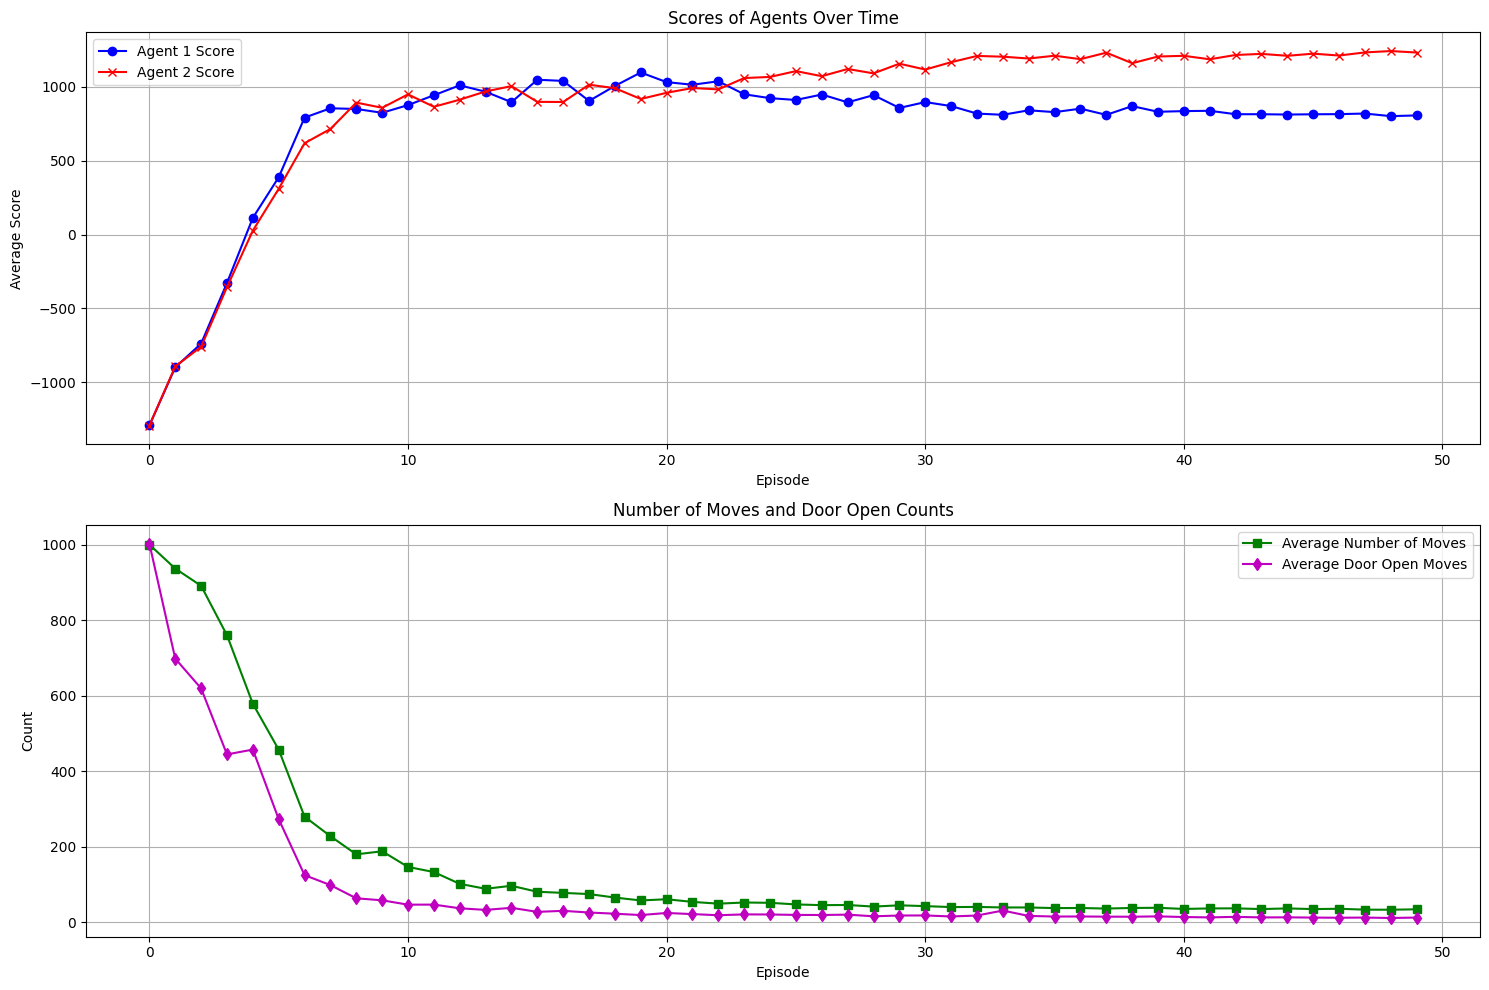

In [14]:
plot_training_results(ag_easy)

Success, model learns easily. Let's add random gate.

In [11]:
ag_random_gate.learn(50)

Episode:1 Average Score:{'agent_1': -1270.003906249991, 'agent_2': -1257.5136718749914} Average NumSteps:994.734375 Average door open 1085.484375
Episode:2 Average Score:{'agent_1': -971.0585937499939, 'agent_2': -967.8695312499941} Average NumSteps:940.171875 Average door open 803.3984375
Episode:3 Average Score:{'agent_1': -735.3535156249968, 'agent_2': -733.4722656249971} Average NumSteps:889.9453125 Average door open 611.28125
Episode:4 Average Score:{'agent_1': -378.0249999999977, 'agent_2': -385.0640624999977} Average NumSteps:786.6015625 Average door open 492.546875
Episode:5 Average Score:{'agent_1': -89.3554687499975, 'agent_2': -62.21132812499757} Average NumSteps:607.6640625 Average door open 514.53125
Episode:6 Average Score:{'agent_1': 279.4644531250012, 'agent_2': 329.63593750000115} Average NumSteps:436.5703125 Average door open 363.4609375
Episode:7 Average Score:{'agent_1': 444.1199218750002, 'agent_2': 432.0855468750003} Average NumSteps:398.21875 Average door open 23

In [12]:
evaluate_policy(env_random_gate, ag_random_gate, 100)

Episode:0 Score:{'agent_1': 1270.9, 'agent_2': 778.55} NumSteps:37 Door opening move: 13
Episode:1 Score:{'agent_1': 774.5, 'agent_2': 1278.5} NumSteps:36 Door opening move: 13
Episode:2 Score:{'agent_1': 774.5, 'agent_2': 1278.5} NumSteps:36 Door opening move: 13
Episode:3 Score:{'agent_1': 778.0, 'agent_2': 1281.9} NumSteps:32 Door opening move: 11
Episode:4 Score:{'agent_1': 1281.8, 'agent_2': 785.4499999999999} NumSteps:29 Door opening move: 9
Episode:5 Score:{'agent_1': 1270.9, 'agent_2': 778.55} NumSteps:37 Door opening move: 13
Episode:6 Score:{'agent_1': 778.0, 'agent_2': 1281.9} NumSteps:32 Door opening move: 11
Episode:7 Score:{'agent_1': 775.3, 'agent_2': 1281.25} NumSteps:38 Door opening move: 13
Episode:8 Score:{'agent_1': 775.3, 'agent_2': 1281.25} NumSteps:38 Door opening move: 13
Episode:9 Score:{'agent_1': 775.3, 'agent_2': 1281.25} NumSteps:38 Door opening move: 13
Episode:10 Score:{'agent_1': 774.5, 'agent_2': 1278.5} NumSteps:36 Door opening move: 13
Episode:11 Scor

In [13]:
evaluate_policy_visual(env_random_gate, ag_random_gate)

Episode:1 Score:{'agent_1': 775.3, 'agent_2': 1281.25} NumSteps:38 Door opening move:13
Episode:2 Score:{'agent_1': 778.0, 'agent_2': 1281.9} NumSteps:32 Door opening move:11
Episode:3 Score:{'agent_1': 1270.9, 'agent_2': 778.55} NumSteps:37 Door opening move:13
Episode:4 Score:{'agent_1': 1281.8, 'agent_2': 785.4499999999999} NumSteps:29 Door opening move:9
Episode:5 Score:{'agent_1': 778.0, 'agent_2': 1281.9} NumSteps:32 Door opening move:11
Episode:6 Score:{'agent_1': 778.0, 'agent_2': 1281.9} NumSteps:32 Door opening move:11
Episode:7 Score:{'agent_1': 1281.8, 'agent_2': 785.4499999999999} NumSteps:29 Door opening move:9
Episode:8 Score:{'agent_1': 1266.9500000000003, 'agent_2': 775.0} NumSteps:41 Door opening move:15
Episode:9 Score:{'agent_1': 1276.4, 'agent_2': 782.05} NumSteps:33 Door opening move:11


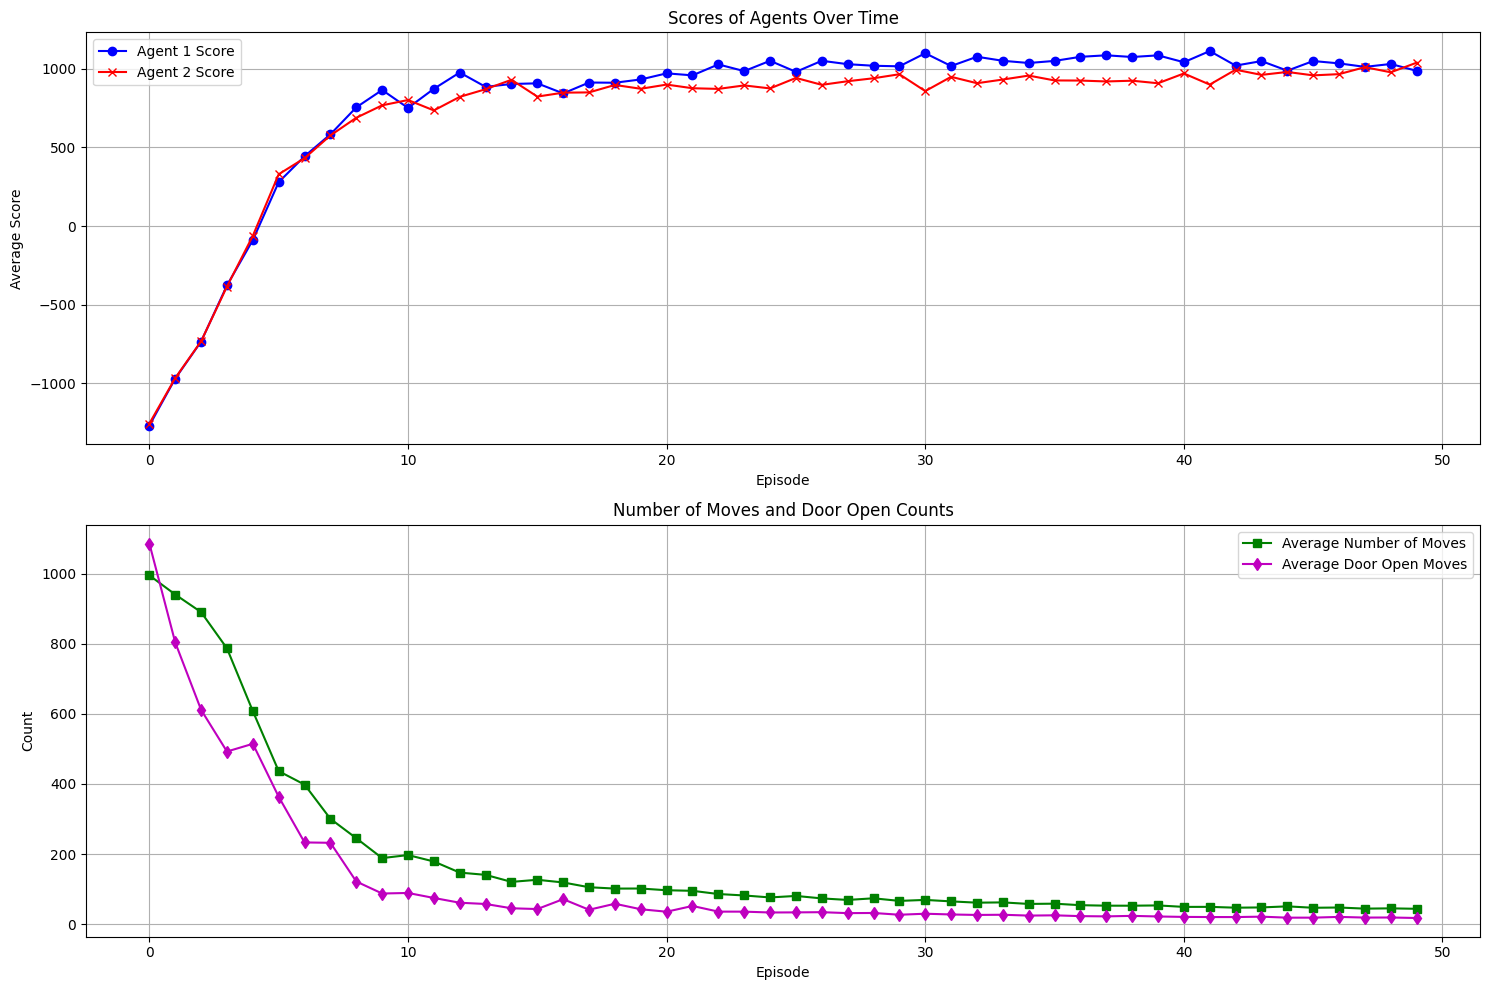

In [14]:
plot_training_results(ag_random_gate)

In [15]:
save_model(ag_random_gate, save_path, 'ag_random_gate')

Let's check even harder env with switched finish cells.

In [16]:
ag_rg_sf.learn(50)

Episode:1 Average Score:{'agent_1': -1466.353906249989, 'agent_2': -1469.707812499989} Average NumSteps:1000.0 Average door open 1263.1953125
Episode:2 Average Score:{'agent_1': -811.6757812499947, 'agent_2': -805.156249999995} Average NumSteps:922.65625 Average door open 711.1875
Episode:3 Average Score:{'agent_1': -723.4203124999958, 'agent_2': -706.5781249999959} Average NumSteps:858.9375 Average door open 669.0
Episode:4 Average Score:{'agent_1': -220.22499999999738, 'agent_2': -223.12148437499724} Average NumSteps:636.9140625 Average door open 560.828125
Episode:5 Average Score:{'agent_1': -289.2519531249965, 'agent_2': -314.6523437499965} Average NumSteps:533.109375 Average door open 704.703125
Episode:6 Average Score:{'agent_1': 138.8593750000013, 'agent_2': 136.49296875000118} Average NumSteps:385.8984375 Average door open 331.3203125
Episode:7 Average Score:{'agent_1': 314.8644531250002, 'agent_2': 320.58828125000025} Average NumSteps:335.7421875 Average door open 219.0859375


In [19]:
evaluate_policy(env_rg_sf, ag_rg_sf, 100, probabilistic=True)

Episode:0 Score:{'agent_1': 751.5999999999999, 'agent_2': 758.05} NumSteps:50 Door opening move: 21
Episode:1 Score:{'agent_1': 777.6500000000001, 'agent_2': 780.25} NumSteps:39 Door opening move: 11
Episode:2 Score:{'agent_1': 783.3000000000002, 'agent_2': 784.55} NumSteps:33 Door opening move: 9
Episode:3 Score:{'agent_1': 773.6, 'agent_2': 776.15} NumSteps:41 Door opening move: 13
Episode:4 Score:{'agent_1': 760.05, 'agent_2': 764.75} NumSteps:45 Door opening move: 19
Episode:5 Score:{'agent_1': 759.75, 'agent_2': 773.3500000000001} NumSteps:48 Door opening move: 15
Episode:6 Score:{'agent_1': 778.7, 'agent_2': 779.25} NumSteps:41 Door opening move: 11
Episode:7 Score:{'agent_1': 743.6500000000001, 'agent_2': 755.5500000000003} NumSteps:68 Door opening move: 13
Episode:8 Score:{'agent_1': 776.85, 'agent_2': 781.25} NumSteps:37 Door opening move: 9
Episode:9 Score:{'agent_1': 768.1500000000001, 'agent_2': 770.7} NumSteps:49 Door opening move: 15
Episode:10 Score:{'agent_1': 753.65, '

In [20]:
evaluate_policy(env_rg_sf, ag_rg_sf, 100, probabilistic=False)

Episode:0 Score:{'agent_1': 209.80000000000052, 'agent_2': 212.9000000000005} NumSteps:100 Door opening move: 9
Episode:1 Score:{'agent_1': 761.3, 'agent_2': 775.2} NumSteps:44 Door opening move: 15
Episode:2 Score:{'agent_1': 208.1500000000005, 'agent_2': 211.35000000000048} NumSteps:100 Door opening move: 11
Episode:3 Score:{'agent_1': -208.25000000000014, 'agent_2': -194.49999999999983} NumSteps:100 Door opening move: 2000
Episode:4 Score:{'agent_1': 761.3, 'agent_2': 775.2} NumSteps:44 Door opening move: 15
Episode:5 Score:{'agent_1': -212.05000000000015, 'agent_2': -190.49999999999983} NumSteps:100 Door opening move: 2000
Episode:6 Score:{'agent_1': 209.80000000000052, 'agent_2': 212.9000000000005} NumSteps:100 Door opening move: 9
Episode:7 Score:{'agent_1': 761.3, 'agent_2': 775.2} NumSteps:44 Door opening move: 15
Episode:8 Score:{'agent_1': -212.05000000000015, 'agent_2': -190.49999999999983} NumSteps:100 Door opening move: 2000
Episode:9 Score:{'agent_1': -208.25000000000014,

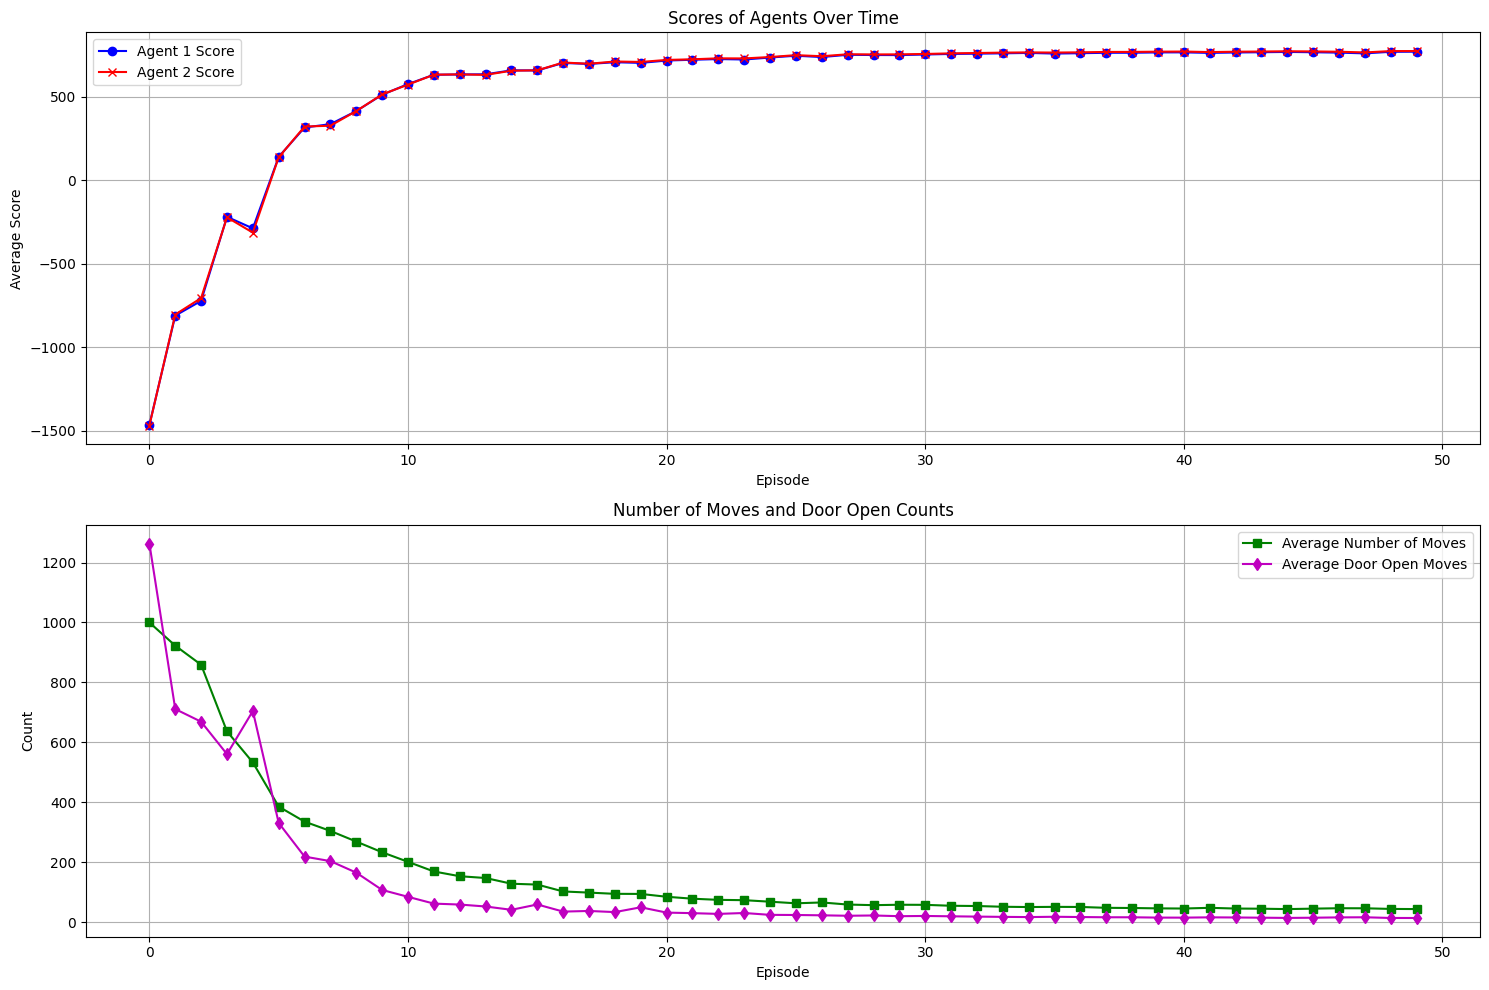

In [28]:
plot_training_results(ag_rg_sf)

In [ ]:
# probabilistic agents solve the maze not badly, however when choosing the deterministic, it fails most of the time
# I changed the Environment reward system a bit, adding some additional penalties for bumping into each other. And also added entropy_coefficient to encourage exploration

In [10]:
ag_rg_sf_perky = PPO(env_rg_sf, DEVICE, entropy_coef=0.01)

In [11]:
ag_rg_sf_perky.learn(60)

Episode:1 Average Score:{'agent_1': -1712.9523437499906, 'agent_2': -1713.9253906249905} Average NumSteps:992.328125 Average door open 1234.7265625
Episode:2 Average Score:{'agent_1': -1201.6699218749934, 'agent_2': -1194.1109374999935} Average NumSteps:925.5 Average door open 865.5546875
Episode:3 Average Score:{'agent_1': -1115.035937499994, 'agent_2': -1126.2128906249936} Average NumSteps:876.3671875 Average door open 772.8984375
Episode:4 Average Score:{'agent_1': -861.664062499995, 'agent_2': -882.0328124999946} Average NumSteps:787.6875 Average door open 726.7890625
Episode:5 Average Score:{'agent_1': -550.6898437499956, 'agent_2': -596.3664062499953} Average NumSteps:625.6875 Average door open 734.109375
Episode:6 Average Score:{'agent_1': -478.81914062499584, 'agent_2': -506.5761718749957} Average NumSteps:535.4921875 Average door open 731.890625
Episode:7 Average Score:{'agent_1': 112.68750000000142, 'agent_2': 76.27656250000156} Average NumSteps:379.34375 Average door open 30

In [14]:
evaluate_policy(env_rg_sf, ag_rg_sf_perky, 100)

Episode:0 Score:{'agent_1': 767.5, 'agent_2': 776.7} NumSteps:40 Door opening move: 13
Episode:1 Score:{'agent_1': 781.8499999999999, 'agent_2': 785.3499999999999} NumSteps:31 Door opening move: 9
Episode:2 Score:{'agent_1': 779.1500000000001, 'agent_2': 774.9} NumSteps:35 Door opening move: 11
Episode:3 Score:{'agent_1': 781.8499999999999, 'agent_2': 785.3499999999999} NumSteps:31 Door opening move: 9
Episode:4 Score:{'agent_1': 781.8499999999999, 'agent_2': 785.3499999999999} NumSteps:31 Door opening move: 9
Episode:5 Score:{'agent_1': 767.5, 'agent_2': 776.7} NumSteps:40 Door opening move: 13
Episode:6 Score:{'agent_1': 767.5, 'agent_2': 776.7} NumSteps:40 Door opening move: 13
Episode:7 Score:{'agent_1': 780.9000000000001, 'agent_2': 772.8} NumSteps:37 Door opening move: 11
Episode:8 Score:{'agent_1': 780.9000000000001, 'agent_2': 772.8} NumSteps:37 Door opening move: 11
Episode:9 Score:{'agent_1': 780.9000000000001, 'agent_2': 772.8} NumSteps:37 Door opening move: 11
Episode:10 Sc

In [15]:
evaluate_policy(env_rg_sf, ag_rg_sf_perky, 100, probabilistic=True)

Episode:0 Score:{'agent_1': 754.8999999999999, 'agent_2': 720.75} NumSteps:67 Door opening move: 17
Episode:1 Score:{'agent_1': 742.6999999999999, 'agent_2': 747.5} NumSteps:58 Door opening move: 23
Episode:2 Score:{'agent_1': 759.8999999999999, 'agent_2': 778.5500000000002} NumSteps:48 Door opening move: 15
Episode:3 Score:{'agent_1': 767.6000000000001, 'agent_2': 752.8} NumSteps:45 Door opening move: 17
Episode:4 Score:{'agent_1': 778.1500000000001, 'agent_2': 774.9499999999999} NumSteps:37 Door opening move: 11
Episode:5 Score:{'agent_1': 762.8999999999999, 'agent_2': 772.6500000000001} NumSteps:44 Door opening move: 13
Episode:6 Score:{'agent_1': 765.55, 'agent_2': 763.0} NumSteps:39 Door opening move: 17
Episode:7 Score:{'agent_1': 775.5000000000002, 'agent_2': 761.5999999999999} NumSteps:49 Door opening move: 13
Episode:8 Score:{'agent_1': 780.9, 'agent_2': 780.4499999999999} NumSteps:35 Door opening move: 9
Episode:9 Score:{'agent_1': 767.3499999999999, 'agent_2': 765.75} NumSte

It is better, but still deterministic agents perform worse. Let's see the hardest environment so far with an additional wall, where agents need to learn to avoid each other in a smart way.

In [7]:
env_hard = Escape(8, render_mode='human',random_gate=True, switched_finish=True,additional_wall=True)

In [7]:
ag_hard = PPO(env_hard, DEVICE, entropy_coef=0.01, decrease_max_moves=False)

In [9]:
env_hard.reward_rates

{'penalty_per_move_per_row': -0.05,
 'penalty_illegal': -1,
 'penalty_closed_door': -3,
 'reward_open_door': 300,
 'reward_escape': 500,
 'penalty_visited': -0.5,
 'penalty_no_sense_waiting': -3,
 'penalty_bumping_into_each_other': -3}

In [13]:
# Slightly changing the rewards
env_hard.reward_rates['penalty_illegal'] = -3
env_hard.reward_rates['penalty_per_move_per_row'] = -0.5

In [12]:
# Adjust the learning rate
ag_hard.lr = 0.0003

In [15]:
ag_hard.learn(70)

Episode:1 Average Score:{'agent_1': -3165.1640625, 'agent_2': -3154.8894531250003} Average NumSteps:1000.0 Average door open 1029.265625
Episode:2 Average Score:{'agent_1': -2712.4671875000004, 'agent_2': -2723.322265625} Average NumSteps:989.8671875 Average door open 787.8359375
Episode:3 Average Score:{'agent_1': -2434.2749999999996, 'agent_2': -2545.1062500000003} Average NumSteps:976.328125 Average door open 615.890625
Episode:4 Average Score:{'agent_1': -1996.282421875, 'agent_2': -2095.4140625} Average NumSteps:906.875 Average door open 521.234375
Episode:5 Average Score:{'agent_1': -1279.605859375, 'agent_2': -1356.988671875} Average NumSteps:691.2890625 Average door open 469.0078125
Episode:6 Average Score:{'agent_1': -1226.30859375, 'agent_2': -1314.7171875} Average NumSteps:590.09375 Average door open 567.2109375
Episode:7 Average Score:{'agent_1': -612.8253906250002, 'agent_2': -694.8371093750001} Average NumSteps:474.3359375 Average door open 285.8125
Episode:8 Average Scor

In [16]:
ag_hard.learn(30)

Episode:1 Average Score:{'agent_1': 651.875390625, 'agent_2': 666.7710937500001} Average NumSteps:66.3046875 Average door open 19.3984375
Episode:2 Average Score:{'agent_1': 651.64765625, 'agent_2': 664.69140625} Average NumSteps:65.9296875 Average door open 20.0390625
Episode:3 Average Score:{'agent_1': 647.53125, 'agent_2': 643.0093749999999} Average NumSteps:71.59375 Average door open 18.609375
Episode:4 Average Score:{'agent_1': 652.22578125, 'agent_2': 661.555859375} Average NumSteps:66.953125 Average door open 19.9453125
Episode:5 Average Score:{'agent_1': 651.917578125, 'agent_2': 650.015625} Average NumSteps:69.390625 Average door open 19.4296875
Episode:6 Average Score:{'agent_1': 653.7316406250001, 'agent_2': 653.1058593749999} Average NumSteps:69.0 Average door open 17.3984375
Episode:7 Average Score:{'agent_1': 619.606640625, 'agent_2': 614.3351562500001} Average NumSteps:83.734375 Average door open 19.03125
Episode:8 Average Score:{'agent_1': 663.713671875, 'agent_2': 683.

In [18]:
ag_hard.lr = 0.00005

In [19]:
ag_hard.learn(20)

Episode:1 Average Score:{'agent_1': 657.7765625, 'agent_2': 676.00390625} Average NumSteps:61.8984375 Average door open 14.5859375
Episode:2 Average Score:{'agent_1': 692.217578125, 'agent_2': 707.3882812500001} Average NumSteps:51.2109375 Average door open 13.7109375
Episode:3 Average Score:{'agent_1': 692.434375, 'agent_2': 711.928125} Average NumSteps:50.7421875 Average door open 14.0
Episode:4 Average Score:{'agent_1': 699.137890625, 'agent_2': 716.49921875} Average NumSteps:48.4453125 Average door open 13.46875
Episode:5 Average Score:{'agent_1': 706.9625, 'agent_2': 720.692578125} Average NumSteps:46.578125 Average door open 13.4453125
Episode:6 Average Score:{'agent_1': 701.5894531250001, 'agent_2': 719.11328125} Average NumSteps:48.1796875 Average door open 13.03125
Episode:7 Average Score:{'agent_1': 706.50546875, 'agent_2': 724.962890625} Average NumSteps:45.875 Average door open 13.8125
Episode:8 Average Score:{'agent_1': 702.89296875, 'agent_2': 718.837890625} Average NumSt

In [22]:
evaluate_policy(env_hard, ag_hard, 100)

Episode:0 Score:{'agent_1': 741.5, 'agent_2': 755.05} NumSteps:34 Door opening move: 10
Episode:1 Score:{'agent_1': 724.0, 'agent_2': 751.25} NumSteps:38 Door opening move: 12
Episode:2 Score:{'agent_1': 745.85, 'agent_2': 746.0} NumSteps:33 Door opening move: 10
Episode:3 Score:{'agent_1': -482.5, 'agent_2': -471.5} NumSteps:100 Door opening move: 2000
Episode:4 Score:{'agent_1': 30.0, 'agent_2': 33.0} NumSteps:100 Door opening move: 14
Episode:5 Score:{'agent_1': 30.0, 'agent_2': 33.0} NumSteps:100 Door opening move: 14
Episode:6 Score:{'agent_1': 30.0, 'agent_2': 33.0} NumSteps:100 Door opening move: 14
Episode:7 Score:{'agent_1': 755.0, 'agent_2': 759.35} NumSteps:30 Door opening move: 8
Episode:8 Score:{'agent_1': 724.0, 'agent_2': 751.25} NumSteps:38 Door opening move: 12
Episode:9 Score:{'agent_1': 755.0, 'agent_2': 759.35} NumSteps:30 Door opening move: 8
Episode:10 Score:{'agent_1': 724.0, 'agent_2': 751.25} NumSteps:38 Door opening move: 12
Episode:11 Score:{'agent_1': -482.5

In [23]:
evaluate_policy(env_hard, ag_hard, 100, probabilistic=True)

Episode:0 Score:{'agent_1': 711.0, 'agent_2': 735.75} NumSteps:46 Door opening move: 12
Episode:1 Score:{'agent_1': 700.5, 'agent_2': 721.25} NumSteps:50 Door opening move: 16
Episode:2 Score:{'agent_1': 687.0, 'agent_2': 728.8} NumSteps:54 Door opening move: 14
Episode:3 Score:{'agent_1': 719.5, 'agent_2': 724.35} NumSteps:40 Door opening move: 12
Episode:4 Score:{'agent_1': 694.35, 'agent_2': 698.0} NumSteps:45 Door opening move: 18
Episode:5 Score:{'agent_1': 713.5, 'agent_2': 740.75} NumSteps:46 Door opening move: 10
Episode:6 Score:{'agent_1': 742.4, 'agent_2': 726.0} NumSteps:39 Door opening move: 12
Episode:7 Score:{'agent_1': 731.5, 'agent_2': 740.2} NumSteps:38 Door opening move: 10
Episode:8 Score:{'agent_1': 687.5, 'agent_2': 717.75} NumSteps:52 Door opening move: 14
Episode:9 Score:{'agent_1': 704.0, 'agent_2': 729.45} NumSteps:48 Door opening move: 16
Episode:10 Score:{'agent_1': 703.5, 'agent_2': 714.85} NumSteps:46 Door opening move: 16
Episode:11 Score:{'agent_1': 680.5

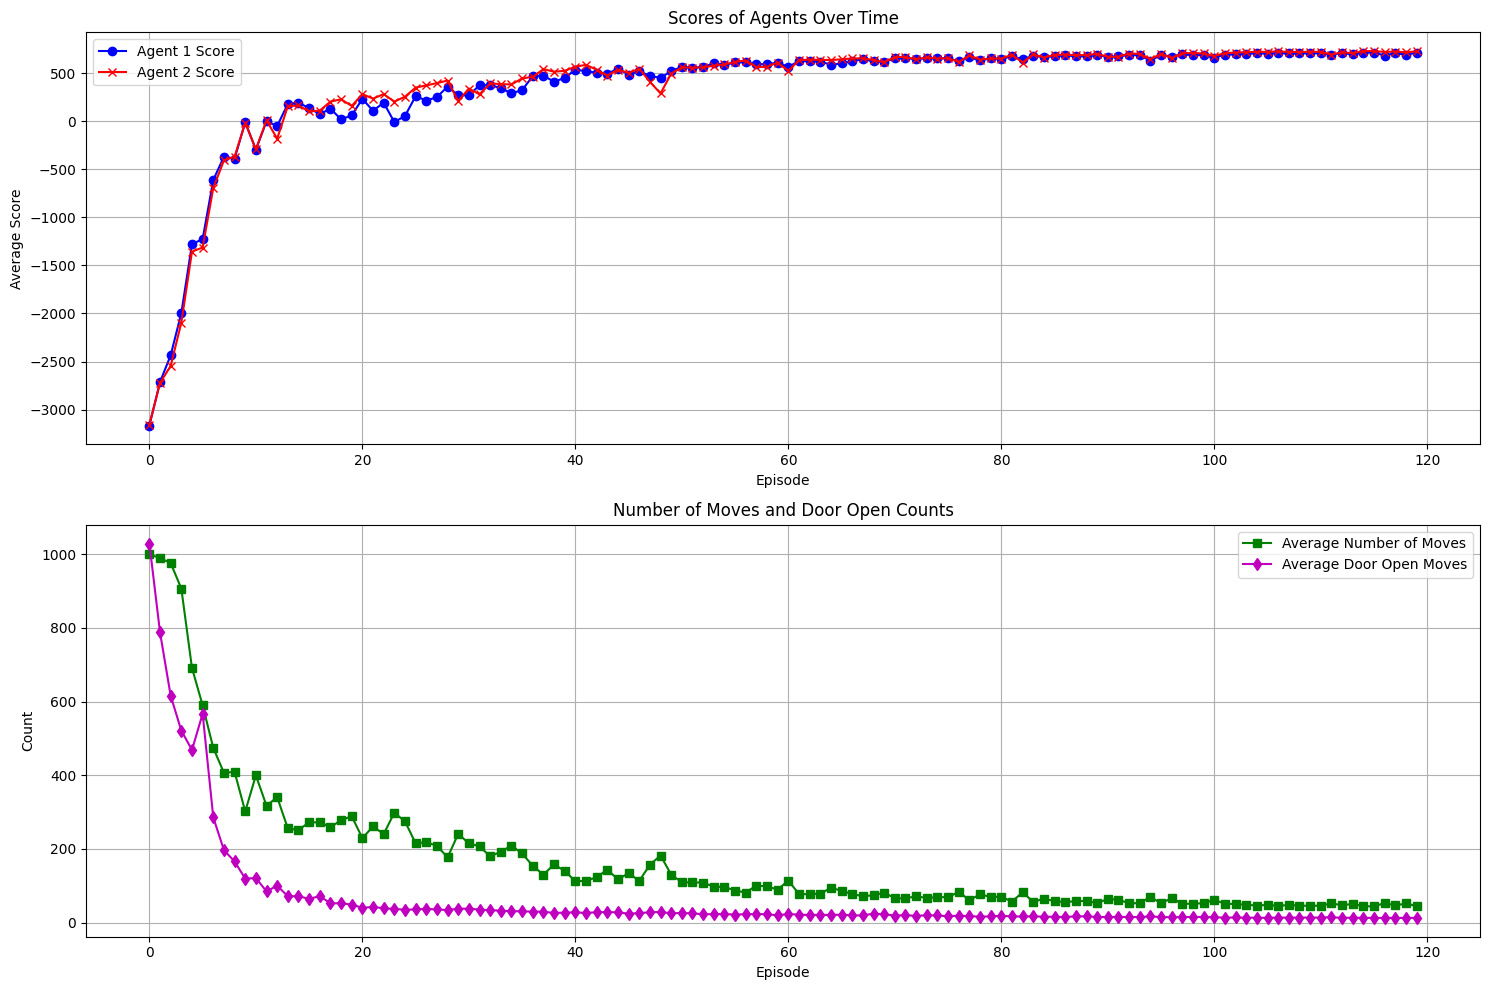

In [24]:
plot_training_results(ag_hard)

In [25]:
evaluate_policy_visual(env_hard, ag_hard)

Episode:1 Score:{'agent_1': 741.5, 'agent_2': 755.05} NumSteps:34 Door opening move:10
Episode:2 Score:{'agent_1': 724.0, 'agent_2': 751.25} NumSteps:38 Door opening move:12
Episode:3 Score:{'agent_1': 693.0, 'agent_2': 739.3} NumSteps:46 Door opening move:16
Episode:4 Score:{'agent_1': 741.5, 'agent_2': 755.05} NumSteps:34 Door opening move:10
Episode:5 Score:{'agent_1': 724.0, 'agent_2': 751.25} NumSteps:38 Door opening move:12
Episode:6 Score:{'agent_1': 724.0, 'agent_2': 751.25} NumSteps:38 Door opening move:12
Episode:7 Score:{'agent_1': 30.0, 'agent_2': 33.0} NumSteps:100 Door opening move:14
Episode:8 Score:{'agent_1': 755.0, 'agent_2': 759.35} NumSteps:30 Door opening move:8
Episode:9 Score:{'agent_1': 741.5, 'agent_2': 755.05} NumSteps:34 Door opening move:10


In [37]:
save_model(ag_hard, save_path, 'ag_hard_v1')

The same situation as with the previous environment, sometimes agents just get stuck. Let's try to train it even more with a higher entropy coefficient 

In [12]:
ag_hard_fine_tune = PPO(env_hard, DEVICE, entropy_coef=0.05, decrease_max_moves=False)

In [13]:
load_model(ag_hard_fine_tune, save_path, model_name='ag_hard_v1')

In [14]:
ag_hard_fine_tune.learn(50)

Episode:1 Average Score:{'agent_1': 745.2160156250002, 'agent_2': 762.2390625} Average NumSteps:53.03125 Average door open 13.46875
Episode:2 Average Score:{'agent_1': 760.5628906249999, 'agent_2': 769.6207031250001} Average NumSteps:44.796875 Average door open 13.453125
Episode:3 Average Score:{'agent_1': 753.469140625, 'agent_2': 763.5421875000001} Average NumSteps:47.546875 Average door open 16.09375
Episode:4 Average Score:{'agent_1': 759.1828125, 'agent_2': 768.8792968750001} Average NumSteps:45.6015625 Average door open 13.796875
Episode:5 Average Score:{'agent_1': 759.123828125, 'agent_2': 769.8882812500001} Average NumSteps:46.234375 Average door open 12.515625
Episode:6 Average Score:{'agent_1': 759.780859375, 'agent_2': 769.8109375000001} Average NumSteps:46.3046875 Average door open 13.4296875
Episode:7 Average Score:{'agent_1': 763.5546875, 'agent_2': 772.31953125} Average NumSteps:43.6640625 Average door open 12.484375
Episode:8 Average Score:{'agent_1': 765.324609375, 'ag

In [15]:
evaluate_policy(env_hard, ag_hard_fine_tune, 100)

Episode:0 Score:{'agent_1': 784.75, 'agent_2': 785.5} NumSteps:30 Door opening move: 8
Episode:1 Score:{'agent_1': 784.75, 'agent_2': 785.5} NumSteps:30 Door opening move: 8
Episode:2 Score:{'agent_1': 784.75, 'agent_2': 785.5} NumSteps:30 Door opening move: 8
Episode:3 Score:{'agent_1': 761.75, 'agent_2': 774.0500000000002} NumSteps:42 Door opening move: 14
Episode:4 Score:{'agent_1': 761.75, 'agent_2': 774.0500000000002} NumSteps:42 Door opening move: 14
Episode:5 Score:{'agent_1': 777.8500000000001, 'agent_2': 774.2} NumSteps:37 Door opening move: 12
Episode:6 Score:{'agent_1': 775.25, 'agent_2': 783.0500000000002} NumSteps:34 Door opening move: 10
Episode:7 Score:{'agent_1': 761.75, 'agent_2': 774.0500000000002} NumSteps:42 Door opening move: 14
Episode:8 Score:{'agent_1': 777.8500000000001, 'agent_2': 774.2} NumSteps:37 Door opening move: 12
Episode:9 Score:{'agent_1': 782.3000000000001, 'agent_2': 779.7} NumSteps:33 Door opening move: 10
Episode:10 Score:{'agent_1': 777.850000000

In [16]:
evaluate_policy_visual(env_hard, ag_hard_fine_tune)

Episode:1 Score:{'agent_1': 761.75, 'agent_2': 774.0500000000002} NumSteps:42 Door opening move:14
Episode:2 Score:{'agent_1': 777.8500000000001, 'agent_2': 774.2} NumSteps:37 Door opening move:12
Episode:3 Score:{'agent_1': 777.8500000000001, 'agent_2': 774.2} NumSteps:37 Door opening move:12
Episode:4 Score:{'agent_1': 777.8500000000001, 'agent_2': 774.2} NumSteps:37 Door opening move:12
Episode:5 Score:{'agent_1': 771.4000000000001, 'agent_2': 768.75} NumSteps:41 Door opening move:14
Episode:6 Score:{'agent_1': 775.25, 'agent_2': 783.0500000000002} NumSteps:34 Door opening move:10
Episode:7 Score:{'agent_1': 761.75, 'agent_2': 774.0500000000002} NumSteps:42 Door opening move:14
Episode:8 Score:{'agent_1': 765.8, 'agent_2': 778.5500000000002} NumSteps:38 Door opening move:12
Episode:9 Score:{'agent_1': 784.75, 'agent_2': 785.5} NumSteps:30 Door opening move:8


Hoooray!! Agents solved the hardest environment!